# Midterm analysis (with Pandas)

## Grade frequencies on 2020.12.04

In [15]:
grades = {
#   'Nota': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'LE': [1,0,2,1,1,1,0,2,1,1,0,3,2,1,7,0,6,2,12,15,169],
    'RE': [2,0,1,3,0,1,0,0,0,1,1,0,4,1,1,3,5,9,24,119,50],
    'PE': [2,0,0,4,1,3,1,5,10,4,7,9,13,29,21,16,23,8,22,5,37]
}  

## Create a data frame from a dictionary

In [16]:
import pandas as pd
df = pd.DataFrame(grades) 

If not inside a Jupyter Notebook, you have to import matplotlib as well

`import matplotlib.pyplot as plt`

## Data frame

In [5]:
df

,LE,RE,PE
0,1,2,2
1,0,0,0
2,2,1,0
3,1,3,4
4,1,0,1
5,1,1,3
6,0,0,1
7,2,0,5
8,1,0,10
9,1,1,4


## How many grades

In [6]:
#df[['LE', 'RE', 'PE']].sum()
df.sum()

LE    227
RE    225
PE    220
dtype: int64

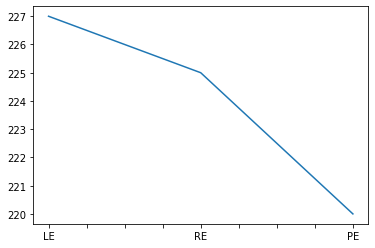

In [7]:
df.sum().plot()

## Plot PE, RE, LE

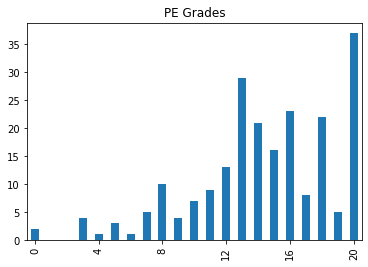

In [8]:
df['PE'].plot(kind='bar', title='PE Grades', xticks=[0, 4, 8, 12, 16, 20])

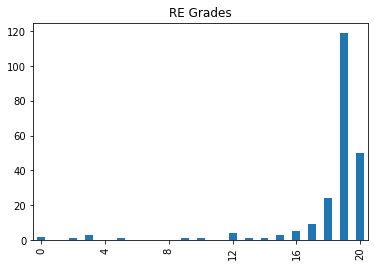

In [9]:
df['RE'].plot(kind='bar', title='RE Grades', xticks=[0, 4, 8, 12, 16, 20])

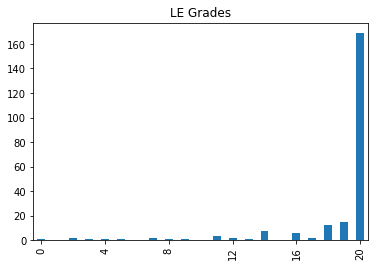

In [10]:
df['LE'].plot(kind='bar', title='LE Grades', xticks=[0, 4, 8, 12, 16, 20])

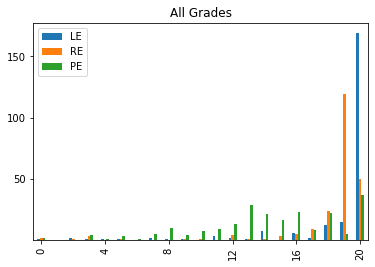

In [11]:
df.plot(kind='bar', title='All Grades', yticks=[50, 100, 150], xticks=[0, 4, 8, 12, 16, 20])

## Show stats (over frequencies?)

In [12]:
## Mean
df.mean()

LE    10.809524
RE    10.714286
PE    10.476190
dtype: float64

In [13]:
## Median
df.median()

LE    1.0
RE    1.0
PE    7.0
dtype: float64

**Not relevant because we have frequencies!**

But, maybe a Kolmogorov-Smirnov test for goodness of fit.

In [14]:
def freqs_to_sample(freqs): 
    return [i for i, f in enumerate(freqs) for _ in range(f)]
#freqs_to_sample(df['LE'])

In [15]:
from scipy.stats import kstest
p_value = kstest(freqs_to_sample(df['LE']), 'norm')[1]

In [16]:
if p_value < 0.05: 
    print("The distribution of LE grades does not follow a normal distribution.")

The distribution of LE grades does not follow a normal distribution.


In [17]:
from scipy.stats import ks_2samp
ks_2samp(freqs_to_sample(df['LE']), freqs_to_sample(df['PE']))[1]

1.1102230246251565e-15

## One image... [femto](https://en.wikipedia.org/wiki/Femto-) or "pico"

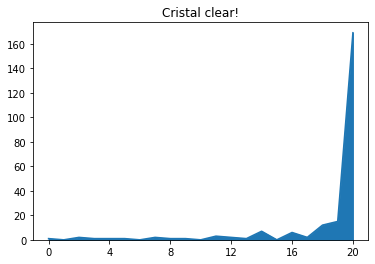

In [18]:
df['LE'].plot(kind='area', title='Cristal clear!', xticks=[0, 4, 8, 12, 16, 20])

# Formative vs Summative assessment

## Formative

> **The purpose of formative assessment is to monitor student learning and provide ongoing feedback to staff and students**.

> It is assessment for learning.

> If designed appropriately, it helps students identify their strengths and weaknesses, can enable students to improve their self-regulatory skills so that they manage their education in a less haphazard fashion than is commonly found.

[Leaning & Teaching at Greenwich](https://www.gre.ac.uk/learning-teaching/assessment/assessment/design/formative-vs-summative)

## Summative

> **The goal of summative assessment is to evaluate student learning at the end of an instructional unit by comparing it against some standard or benchmark**. 

> Summative assessments often have high stakes and are treated by the students as the priority over formative assessments.

> However, feedback from summative assessments can be used formatively by both students and faculty to guide their efforts and activities in subsequent courses.

[Leaning & Teaching at Greenwich](https://www.gre.ac.uk/learning-teaching/assessment/assessment/design/formative-vs-summative)

# Conclusões (in Portuguese now)

## Avaliação (LE em COVID)

> A análise das classificações a meio do semestre mostra que, em condições diferentes daquelas para as quais foi desenhada, a avaliação LE não cumpre o propósito:

- não dá ao professor qualquer feedback válido sobre assuntos que tenham de ser revistos
- não dá ao estudante uma ideia clara dos assuntos que tem de rever

- **As respostas erradas passam a descontar 1/4 do valor da pergunta**

- **Há apenas uma pergunta por página e a navegação é sequencial**

## Análise das respostas ao LE15 (que não conta para a nota final!)

In [17]:
df15 = pd.read_csv('images/15/FEUP-EIC0005-LE15.csv')

### A amostra LE15

In [18]:
df15

,Time,Grade,Q1,Q2,Q3,Q4,Q5
0,4 mins 33 secs,100,20,20,20,20,20
1,4 mins 38 secs,100,20,20,20,20,20
2,4 mins,100,20,20,20,20,20
3,5 mins,100,20,20,20,20,20
4,5 mins 1 sec,100,20,20,20,20,20
...,...,...,...,...,...,...,...
172,4 mins 5 secs,-25,-5,-5,-5,-5,-5
173,3 mins 23 secs,-25,-5,-5,-5,-5,-5
174,3 mins 48 secs,-25,-5,-5,-5,-5,-5
175,2 mins 46 secs,-25,-5,-5,-5,-5,-5


In [19]:
print("Mean:", round(df15['Grade'].mean(),1))
print("Median:", round(df15['Grade'].median(),1))

Mean: 32.0
Median: 30.0


### As frequências das notas

In [25]:
grades15 = {
   'LE15': [46, 8, 4, 3, 2, 23, 5, 3, 0, 0, 38, 7, 2, 0, 0, 25, 2, 0, 0, 0, 9]
}
df15 = pd.DataFrame(grades15)
df15

,LE15
0,46
1,8
2,4
3,3
4,2
5,23
6,5
7,3
8,0
9,0


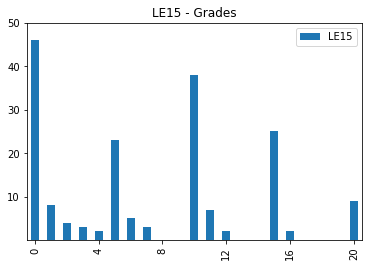

In [28]:
df15.plot(kind='bar', title='LE15 - Grades', yticks=[10, 20, 30, 40, 50], xticks=[0, 4, 8, 12, 16, 20])

**"Houston, we have a problem"**

## Respostas a cada questão

In [41]:
grades_qs = {
#   'Aval': [20, 0, -5],
# col. 0: certa, col. 1: n/ respondeu, col. 2: errada
    'Q1': [43, 9, 125],
    'Q2': [91, 8, 78],
    'Q3': [78, 18, 81],
    'Q4': [84, 11, 82],
    'Q5': [94, 21, 62]
}
dfqs = pd.DataFrame(grades_qs)
dfqs

,Q1,Q2,Q3,Q4,Q5
0,43,91,78,84,94
1,9,8,18,11,21
2,125,78,81,82,62


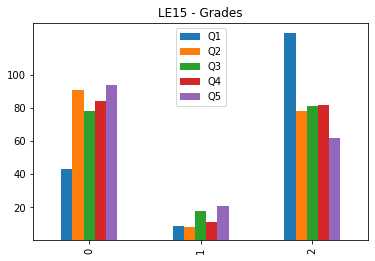

In [43]:
dfqs.plot(kind='bar', title='LE15 - Grades', yticks=[20, 40, 60, 80, 100])
# 0 (certa), 1 (n/ respondeu), 2 (errada)

## Conclusões

- ainda não dá ao professor feedback válido sobre assuntos que tenham de ser revistos, porque há muitas respostas erradas (coluna 2 do gráfico)
  - a partir de Q1 dá a indicação que 1/2 dos estudantes perceberam os conceitos explicados... talvez por terem visto previamente os NB!
  - ou então é outra coisa... e talvez seja preciso diminuir o tempo dado para cada resposta
- já deve dar ao estudante uma ideia clara dos assuntos que tem de rever

**Precisamos de responder com mais cuidado para interpretar a pergunta!!**